# Input dataset from Google Drive and import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
# library
import numpy as np
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation
import cv2

In [3]:
%cd /content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset

/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset


In [4]:
ls

'!'/  ')'/   +/   -/  '='/   ]/   cos/   lim/   log/   times/


In [5]:
os.listdir('/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset')

['!', ')', '+', '-', '=', ']', 'cos', 'lim', 'log', 'times']

# Visualizing dataset

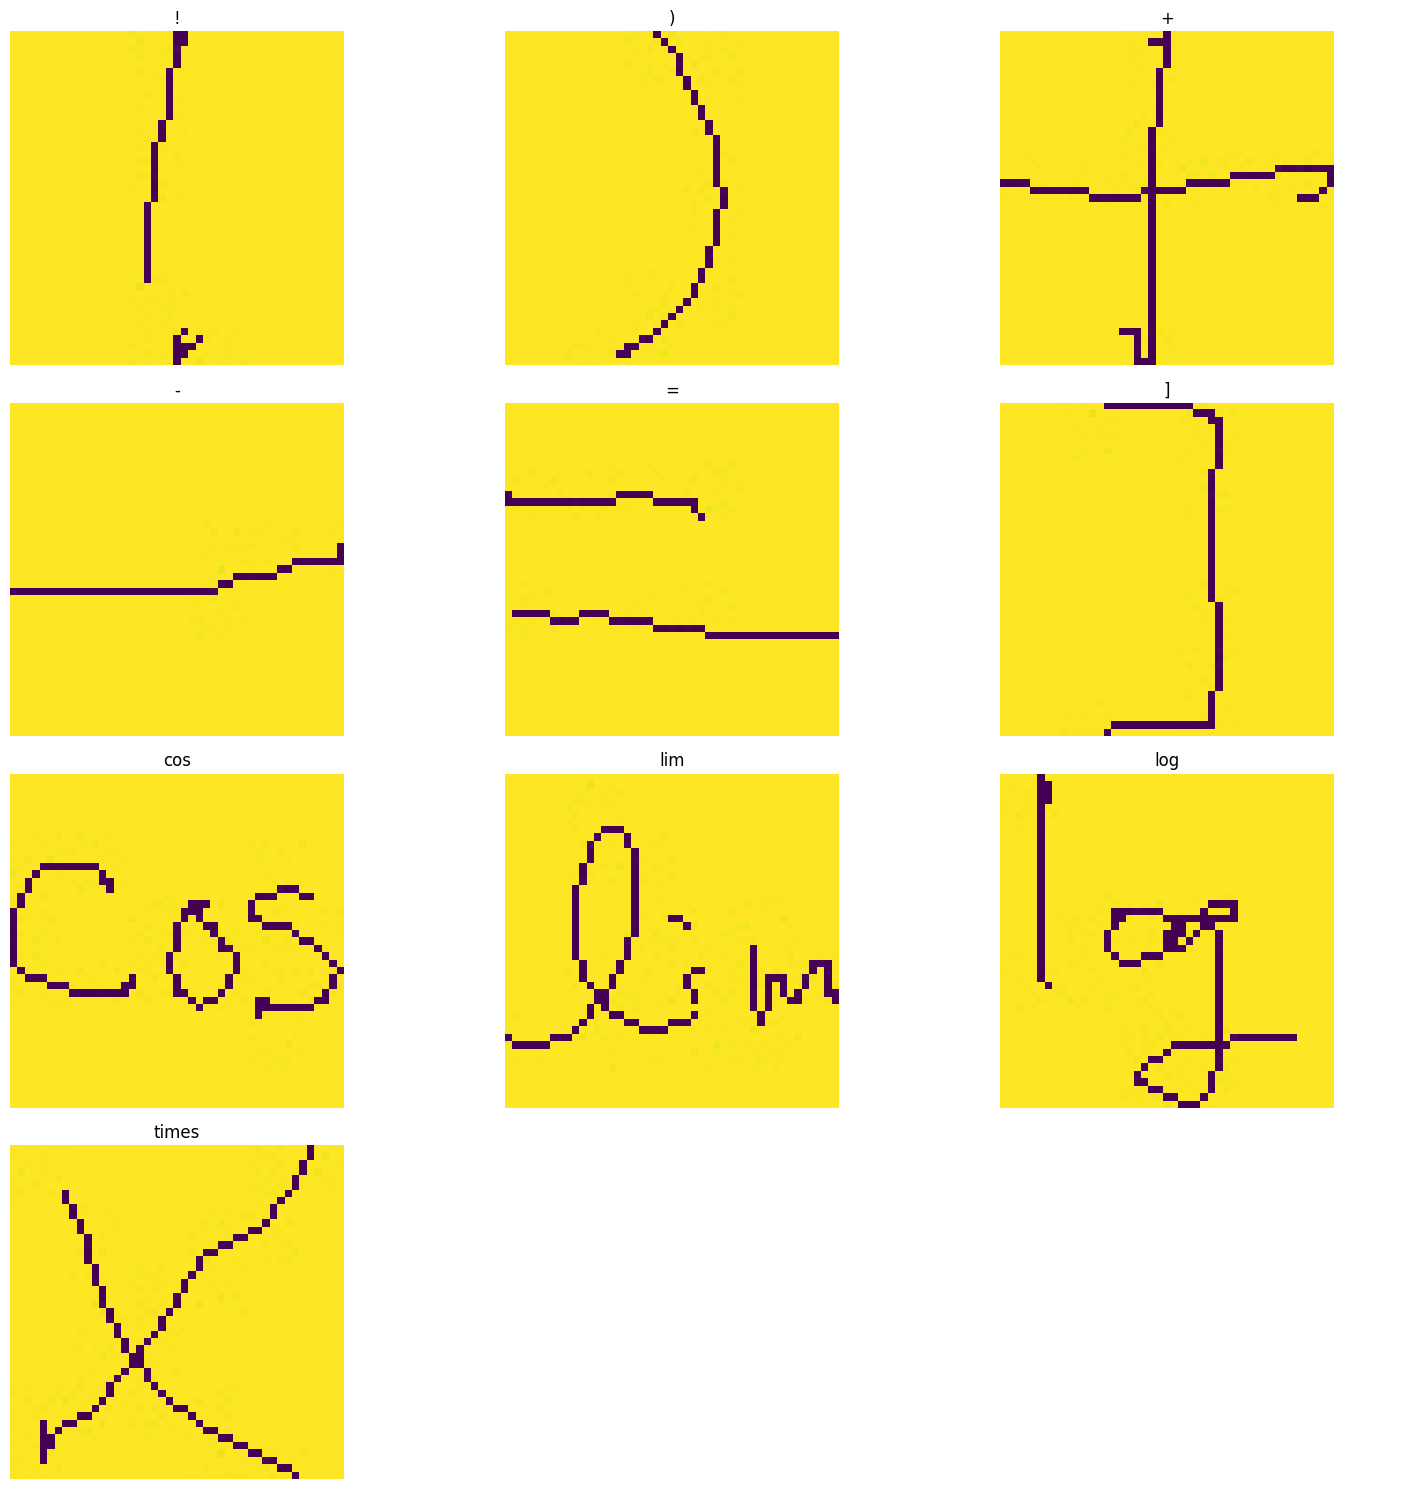

In [ ]:
import random
import matplotlib.image as mpimg

#define dataset path
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset'

# Get a list of categories
categories = os.listdir(dataset_path)

# Set the number of images displayed in each row
num_columns = 3

# Count rows
num_rows = len(categories) // num_columns
if len(categories) % num_columns != 0:
    num_rows += 1

# Create subgraph
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Go through each category and randomly select an image to visualize
for i, cls in enumerate(categories):
    # Get category path
    category_path = os.path.join(dataset_path, cls)
    # Get all images in this category
    images = os.listdir(category_path)
    # If there are no images in this category, skip it
    if len(images) == 0:
        continue
    # randomly select an image
    random_image = random.choice(images)
    # Image path
    image_path = os.path.join(category_path, random_image)
    # Read and display images
    img = mpimg.imread(image_path)
    row = i // num_columns
    col = i % num_columns
    if num_rows == 1:
        axes[col].imshow(img)
        axes[col].set_title(cls)
        axes[col].axis('off')
    else:
        axes[row, col].imshow(img)
        axes[row, col].set_title(cls)
        axes[row, col].axis('off')

# If the last row is not filled with images, hide the remaining sub-images
if len(categories) % num_columns != 0:
    for j in range(len(categories) % num_columns, num_columns):
        axes[num_rows - 1, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Read the images file from dataset



In [34]:
# Read the image file paths in the dataset and store them in a list
from pathlib import Path
from tqdm import tqdm

dataset_path = Path('/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset')
labels_data = []
images_data = []

for label_path in tqdm(dataset_path.glob('*')):
    label = label_path.name
    for file_path in label_path.glob('*'):
        image = cv2.imread(str(file_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_data.append(image)
        labels_data.append(label)


10it [00:48,  4.89s/it]


In [ ]:
images_data[:10] #Print the first ten data in the dataset

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
len(images_data) #Confirm that the dataset is not missing

5000

#Creating int Label

In [37]:
# Convert category names to numbers, Because neural networks can only accept numeric types
labelNames = {'!': 0,')': 1,'+': 2,'-': 3,'=': 4,']': 5,'cos': 6,'lim': 7,'log': 8,'times': 9}

In [38]:
print(labels_data)

['!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!',

In [39]:
numeric_labels = []

for label in labels_data:
    numeric_label = labelNames[label]
    numeric_labels.append(numeric_label)

print(numeric_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Spliting the dataset

In [40]:
from sklearn.model_selection import train_test_split

# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(images_data, labels_data, test_size=0.2, random_state=0)

# Split the validation set again
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print("Training set size:", np.shape(X_train))
print("Test set size:",  np.shape(X_test))
print("Validation set size:", np.shape(X_val))

Training set size: (4000, 45, 45)
Test set size: (500, 45, 45)
Validation set size: (500, 45, 45)


# HoG

In [41]:
from skimage.feature import hog

def hog_convert(images_data, labels_data):
    hog_features = []
    labels = []
    for img_index in range(len(images_data)):
        image = images_data[img_index]
        # Compute HOG features for the image
        fd = hog(image, orientations=9, pixels_per_cell=(10, 10),
                 cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        hog_features.append(fd)
        labels.append(labels_data[img_index])
    return hog_features, labels


In [42]:
image_train, label_train= hog_convert(X_train,y_train)
image_test, label_test= hog_convert(X_test,y_test)
image_val, label_val= hog_convert(X_val,y_val)

In [43]:
np.shape(image_train)

(4000, 324)

# Transfer List to Array

In [44]:
type(X_train)

list

In [45]:
demo_image = X_test

In [46]:
# Before using TensorFlow to build and train a neural network model, you need to convert the training set, test set, and validation set into arrays.
X_train = np.array(image_train)
X_test = np.array(image_test)
X_val = np.array(image_val)

y_train = np.array(label_train)
y_test = np.array(label_test)
y_val = np.array(label_val)

In [47]:
type(X_train)

numpy.ndarray

# Training Model

## Training ANN Model

In [48]:
print("Training set size:", np.shape(X_train))

Training set size: (4000, 324)


In [49]:
len(np.unique(y_train))

10

In [50]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[324]),
                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)
                                    ])


In [51]:
np.shape(X_train),np.shape(y_train)

((4000, 324), (4000,))

In [52]:
np.shape(X_train)

(4000, 324)

In [53]:
y_train

array([']', 'cos', ')', ..., '-', ']', ']'], dtype='<U5')

In [54]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

array([5, 6, 1, ..., 3, 5, 5])

In [55]:
y_val_encoded = label_encoder.transform(y_val)

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val_encoded), batch_size = 100,epochs = 20)

Epoch 1/20
40/40 [==============================] - 2s 14ms/step - loss: 1.0541 - accuracy: 0.7398 - val_loss: 0.2453 - val_accuracy: 0.9180
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.1788 - accuracy: 0.9440 - val_loss: 0.1277 - val_accuracy: 0.9700
Epoch 3/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0981 - accuracy: 0.9690 - val_loss: 0.1146 - val_accuracy: 0.9680
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.2134 - val_accuracy: 0.9220
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 0.0840 - accuracy: 0.9725 - val_loss: 0.1076 - val_accuracy: 0.9720
Epoch 6/20
40/40 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.0727 - val_accuracy: 0.9860
Epoch 7/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.9918 - val_loss: 0.1073 - val_accuracy: 0.9680
Epoch 8/20
40/40 

## Evaluation of ANN Model

In [57]:
y_pred = model.predict(X_test)
y_pred_list = []
for i in range(len(y_pred)):
  y_temp_pred = np.argmax(y_pred[i])
  y_pred_list.append(y_temp_pred)
y_pred_list[:10]

16/16 [==============================] - 0s 2ms/step


[4, 0, 4, 1, 0, 9, 5, 7, 4, 8]

In [58]:
# Convert y_test to numeric labels
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

[[48  0  1  0  0  1  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  1  0  0]
 [ 0  0  0 49  3  0  1  0  0  0]
 [ 0  0  1  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 58]]


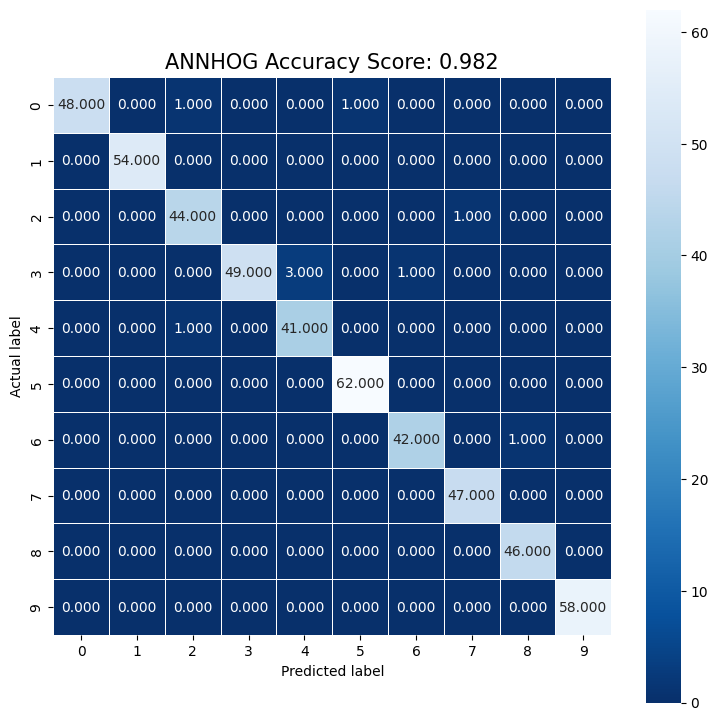

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test_numeric, y_pred_list)
print(cm)

test_acc = accuracy_score(y_test_numeric, y_pred_list)
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'ANNHOG Accuracy Score: {0}'.format(test_acc)
plt.title(all_sample_title, size = 15);

## Visualize results

In [60]:
labelNames

{'!': 0,
 ')': 1,
 '+': 2,
 '-': 3,
 '=': 4,
 ']': 5,
 'cos': 6,
 'lim': 7,
 'log': 8,
 'times': 9}

In [61]:
labelNames = ['!',')','+','-','=',']','cos','lim','log','times']

In [62]:
type(y_test)

numpy.ndarray

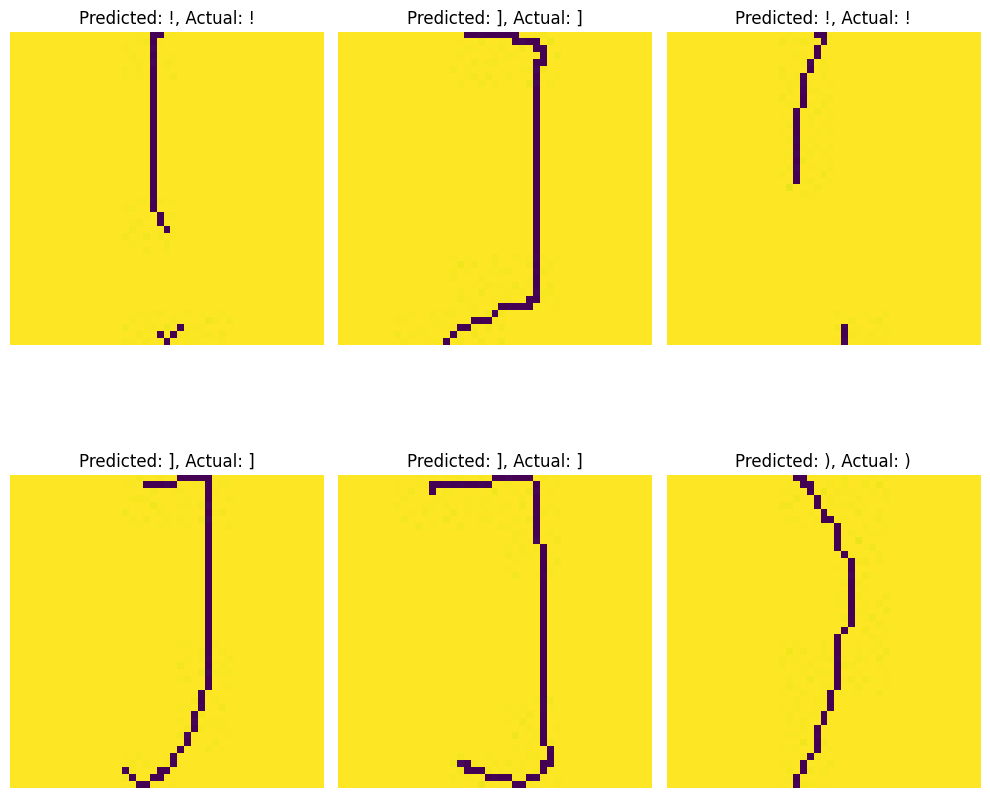

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 9 different random indexes
random_indices = np.random.choice(250, 6, replace=False)

# Visualizing images using Matplotlib
plt.figure(figsize=(10, 10))

# Go through and display the image corresponding to each randomly selected index
for i, idx in enumerate(random_indices):
    predicted_label_idx = np.argmax(y_pred[idx])
    predicted_label = labelNames[predicted_label_idx]
    plt.subplot(2, 3, i+1)  # Create a 3x3 grid
    plt.imshow(demo_image[idx])
    plt.title(f'Predicted: {predicted_label}, Actual: {y_test[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## SVM Model

In [36]:
np.shape(image_train)

(4000, 324)

In [64]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#SVM models
SVM = SVC(kernel='linear', C=10000.0, gamma='auto')
SVM.fit(image_train,label_train)
y_pred = SVM.predict(image_test)
# Calculate accuracy score
test_accuracy = accuracy_score(label_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.992


In [65]:
y_val_pred = SVM.predict(image_val)
val_accuracy = accuracy_score(label_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.97


## Evaluation of SVM Model

[[49  0  0  0  0  1  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 52  1  0  0  0  0  0]
 [ 0  0  1  1 40  0  0  0  0  0]
 [ 0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 58]]


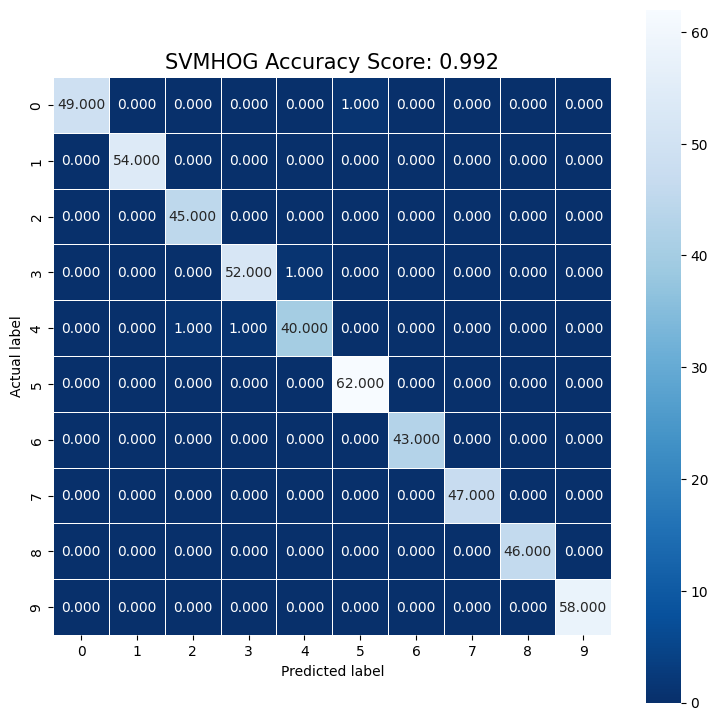

In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
# plot the confusion matrix
cm  = metrics.confusion_matrix(label_test, y_pred)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVMHOG Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15);

## Visualize results

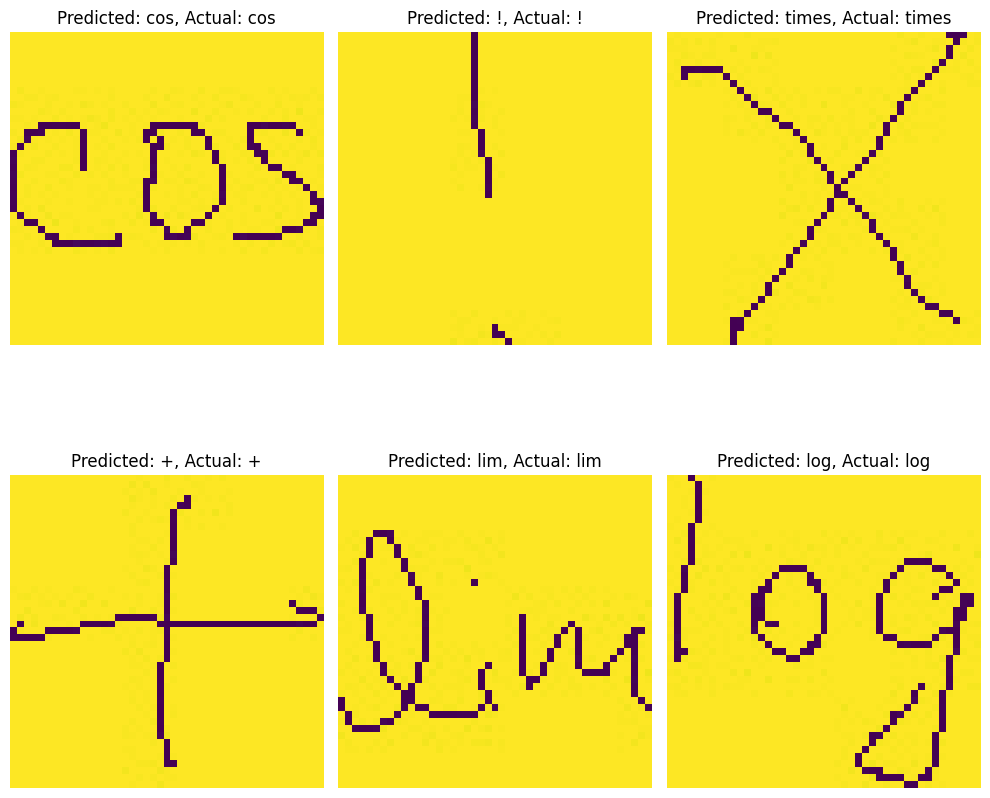

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 9 different random indexes
random_indices = np.random.choice(100, 6, replace=False)

# Visualizing images using Matplotlib
plt.figure(figsize=(10, 10))

# Go through and display the image corresponding to each randomly selected index
for i, idx in enumerate(random_indices):
    predicted_label = y_pred[idx]  # Directly use the label returned by SVM as the predicted label
    plt.subplot(2, 3, i+1)  # Create a 3x3 grid
    plt.imshow(demo_image[idx])
    plt.title(f'Predicted: {predicted_label}, Actual: {y_test[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()